In [1]:
import scvi
import os
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, precision_score, log_loss
from sklearn.model_selection import train_test_split
from torch.utils.tensorboard import SummaryWriter

Global seed set to 0
/home/brunopsz/Env/my_env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/brunopsz/Env/my_env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.cuda.set_device(1)
print("Device", device)
adata = ad.read_h5ad('/home/brunopsz/Data/scanvi_trained_adata_on_5000_genes_latent_10.h5ad')
adata

Device cuda


AnnData object with n_obs × n_vars = 77146 × 5000
    obs: 'barcode_name', 'Sample', 'Cluster', '_scvi_batch', '_scvi_labels'
    var: 'gene_name', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg'
    obsm: 'X_scANVI'
    layers: 'counts'

In [3]:
import umap

In [4]:
reducer = umap.UMAP()

In [5]:
scaled_data = reducer.fit_transform(adata.obsm['X_scANVI'])

In [7]:
import seaborn as sns

In [8]:
color_dict = {
    'MoAM2': '#7fc97f',
    'MoAM3': '#beaed4',
    'AT2, AT1 cells': '#fdc086',
    'DC2': '#ffff99',
    'CD8 cytotoxic TRM T cells': '#386cb0',
    'iNKT cells': '#f0027f',
    'MoAM4': '#bf5b17',
    'CD4 prolif. T cells': '#666666',
    'Ionocytes': '#a6cee3',
    'Plasma cells': '#1f78b4',
    'Migratory DC': '#b2df8a',
    'B cells': '#33a02c',
    'CD4 CM T cells': '#fb9a99',
    'Ciliated cells': '#e31a1c',
    'Club, Basal cells': '#fdbf6f',
    'CD8 prolif. T cells': '#ff7f00',
    'Prolif. AM': '#cab2d6',
    'MoAM1': '#6a3d9a',
    'DC1': '#ffff33',
    'TRAM2': '#b15928',
    'CD8 cytotoxic T cells': '#8dd3c7',
    'Infected AT2, AT1 cells': '#b2182b',
    'CD4 cytotoxic T cells': '#bebada',
    'Treg': '#fb8072',
    'pDC': '#80b1d3',
    'Mast cells': '#fdb462',
    'Mixed myeloid': '#b3de69',
    'TRAM1': '#fccde5',
}

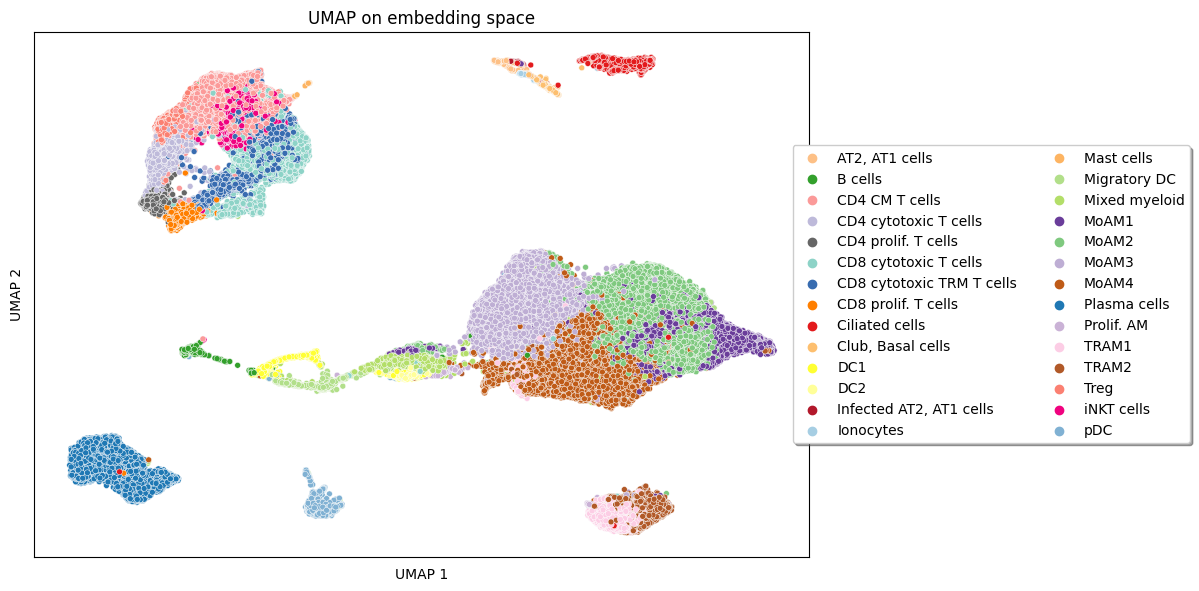

In [9]:
fig = plt.figure(4, figsize=(10,15))
ax = fig.add_subplot(211) 
g = sns.scatterplot(data=scaled_data, x=scaled_data[:,0], y=scaled_data[:,1], hue=adata.obs['Cluster'], palette=color_dict, size = 0.1, legend="full")
h,l = g.get_legend_handles_labels()
ax.legend(h[0:28], l[0:28], loc='center right', bbox_to_anchor=(1.5, 0.5),
          ncol=2, fancybox=True, shadow=True)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.xticks(())
plt.yticks(())
plt.title("UMAP on embedding space")
plt.show(g)